# Exploratory Data Analysis

## Load Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

## Load the Breast Cancer Dataset
We will use the sklearn.datasets.load_breast_cancer() function to load the Wisconsin Breast Cancer dataset. This dataset consists of 30 features computed from digitized images of a fine needle aspirate (FNA) of a breast mass. Each sample is labeled as either malignant (cancerous) or benign (non-cancerous).

In [5]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

print(data.keys())
print(data["DESCR"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

## Convert Dataset to Pandas Dataframe

## Convert Class labels to binary numbers
0 = benign \
1 = Malignant

In [7]:
data = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Flip target so Malignant = 1, Benign = 0
y_flipped = 1 - y

# Create DataFrame
df = X.copy()
df["diagnosis_numeric"] = y_flipped
df["diagnosis_label"] = df["diagnosis_numeric"].map({0: "Benign", 1: "Malignant"})

print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Explore the Dataset
- shape of the dataset
- Check for missing values
- Class distribution

In [11]:
print("Shape of features:", X.shape)
print("Shape of Target:", y.shape)

Shape of features: (569, 30)
Shape of Target: (569,)


In [12]:
print(X.isnull().sum().sort_values(ascending=False).head())

mean radius             0
mean texture            0
worst symmetry          0
worst concave points    0
worst concavity         0
dtype: int64


No Nan present in dataframe so I dont need to .drop() any rows or columns

In [14]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


## Class Distribution

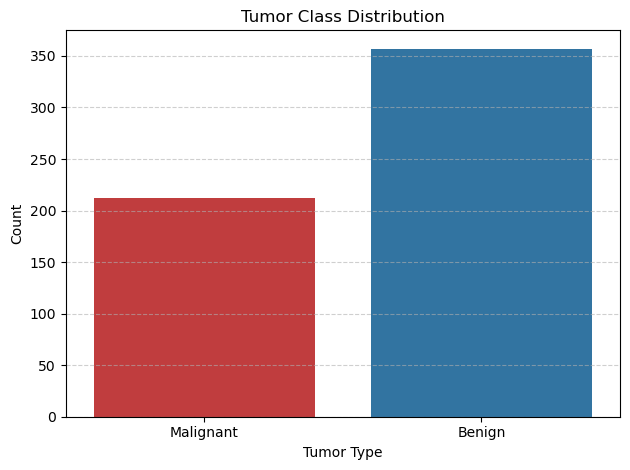

diagnosis_label
Benign       357
Malignant    212
Name: count, dtype: int64


In [16]:
# Plot
colours = {"Benign": "#1f77b4", "Malignant": "#d62728"}
counts = df["diagnosis_label"].value_counts()

sns.countplot(
    x="diagnosis_label",
    hue="diagnosis_label",  
    data=df,
    palette=colours,
    order=["Malignant", "Benign"],
    legend=False
)

plt.title("Tumor Class Distribution")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

print(counts)

## Summary Statistics

To understand the dataset, compute **summary statistics** for each feature.

In [18]:
stats = df.describe()

display(stats)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis_numeric
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Correlation heatmap

Correlation map to see which features are strongly linked, especially with the diagnosis. Good for spotting anything that might be redundant or actually useful later on. Darker colours mean stronger correlation, and I added the numbers just to make it easier to see what’s going on.


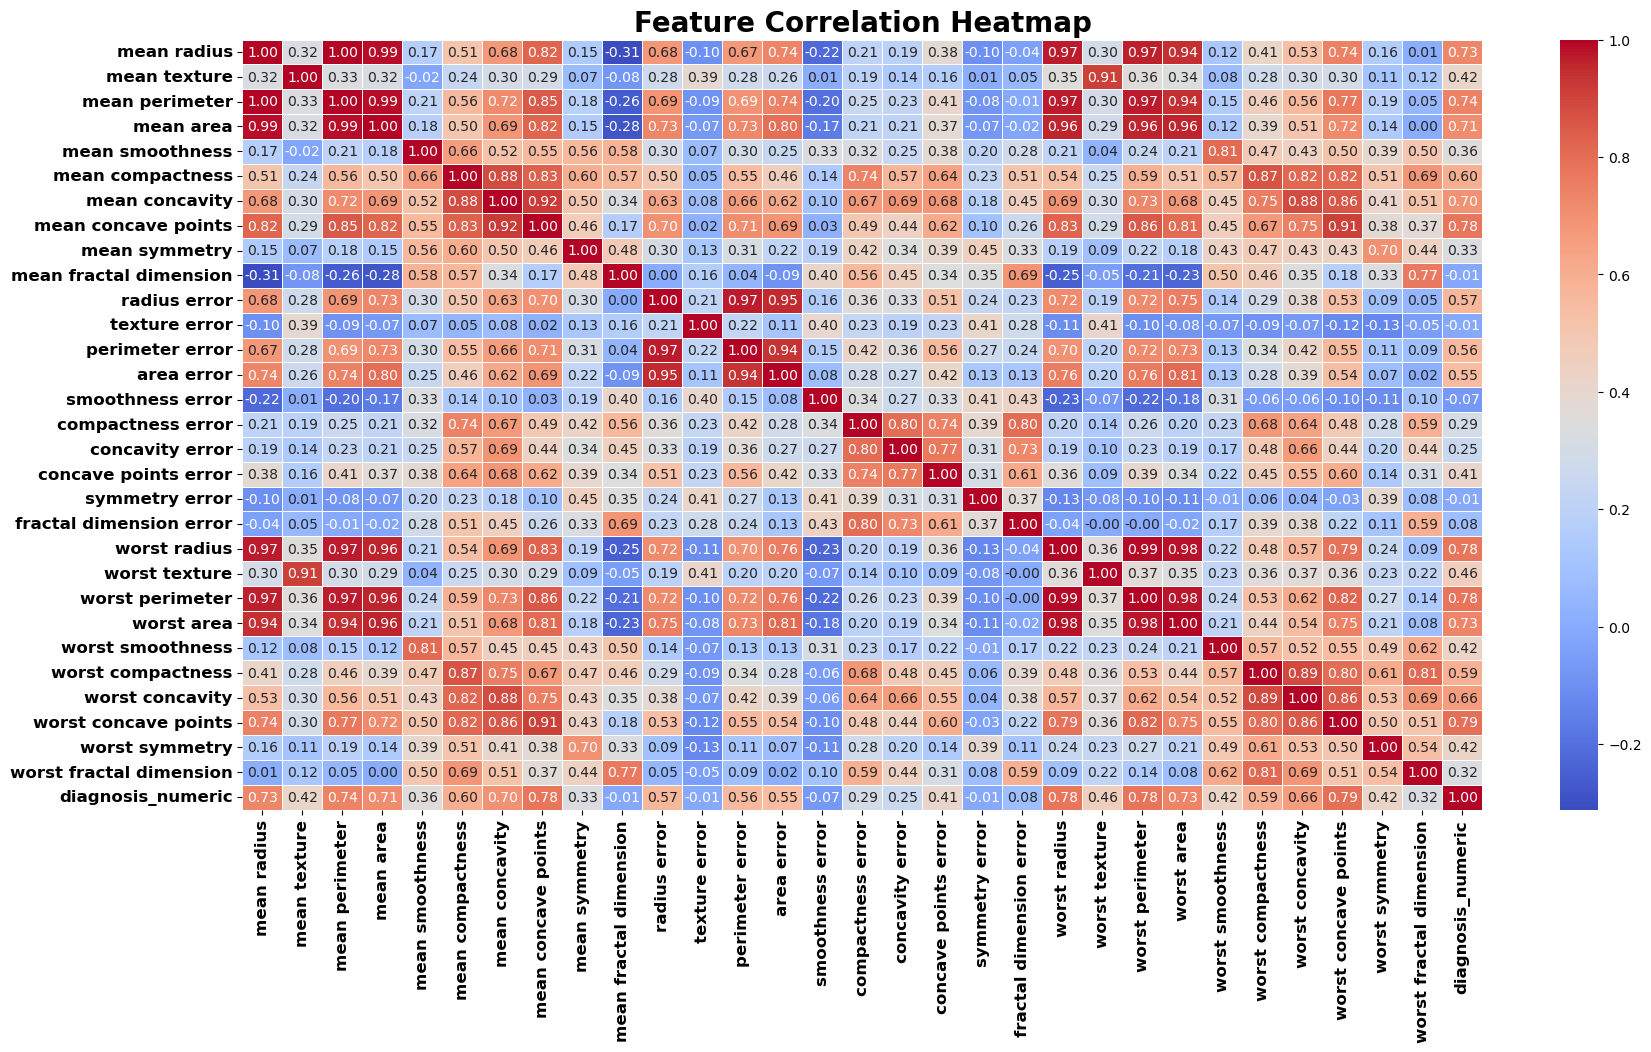

In [20]:
df["diagnosis_numeric"] = df["diagnosis_label"].map({"Benign": 0, "Malignant": 1})

numeric_df = df.drop(columns=["diagnosis_label"])
corr_map = numeric_df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_map, cmap="coolwarm", annot=True,fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=20, fontweight="bold",)

plt.xticks(fontsize=12, fontweight="bold") 
plt.yticks(fontsize=12, fontweight="bold")

plt.savefig("corr_heatmap.png", dpi=300, bbox_inches="tight")

plt.show()

## Selecting a range of highly correlated features

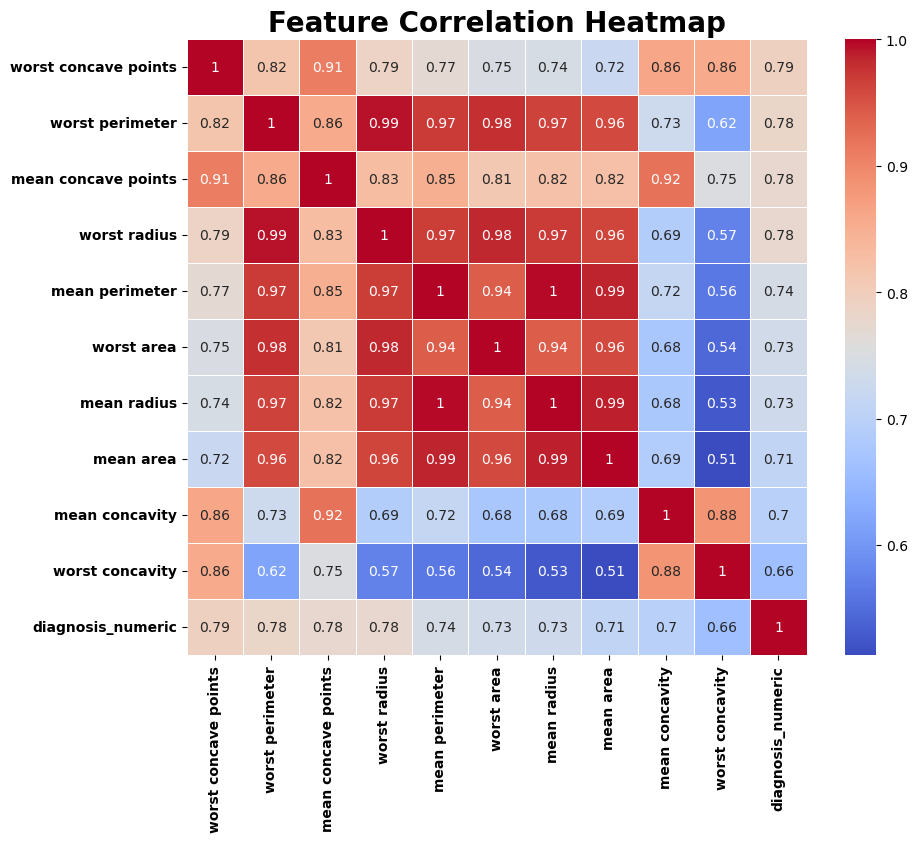

In [22]:
df_corr = numeric_df[[
    "worst concave points",
    "worst perimeter",
    "mean concave points",
    "worst radius",
    "mean perimeter",
    "worst area",
    "mean radius",
    "mean area",
    "mean concavity",
    "worst concavity",
    "diagnosis_numeric"
]]


corr_matrix = df_corr.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)


plt.title("Feature Correlation Heatmap", fontsize=20, fontweight="bold",)
plt.xticks(fontweight="bold",)  
plt.yticks(fontweight="bold",)    
plt.savefig("corr_heatmap_top10.png", dpi=300, bbox_inches="tight")
plt.show()

## KDE Plots For Each Feature
Checking the distribution for each feature for benign and malignant cases

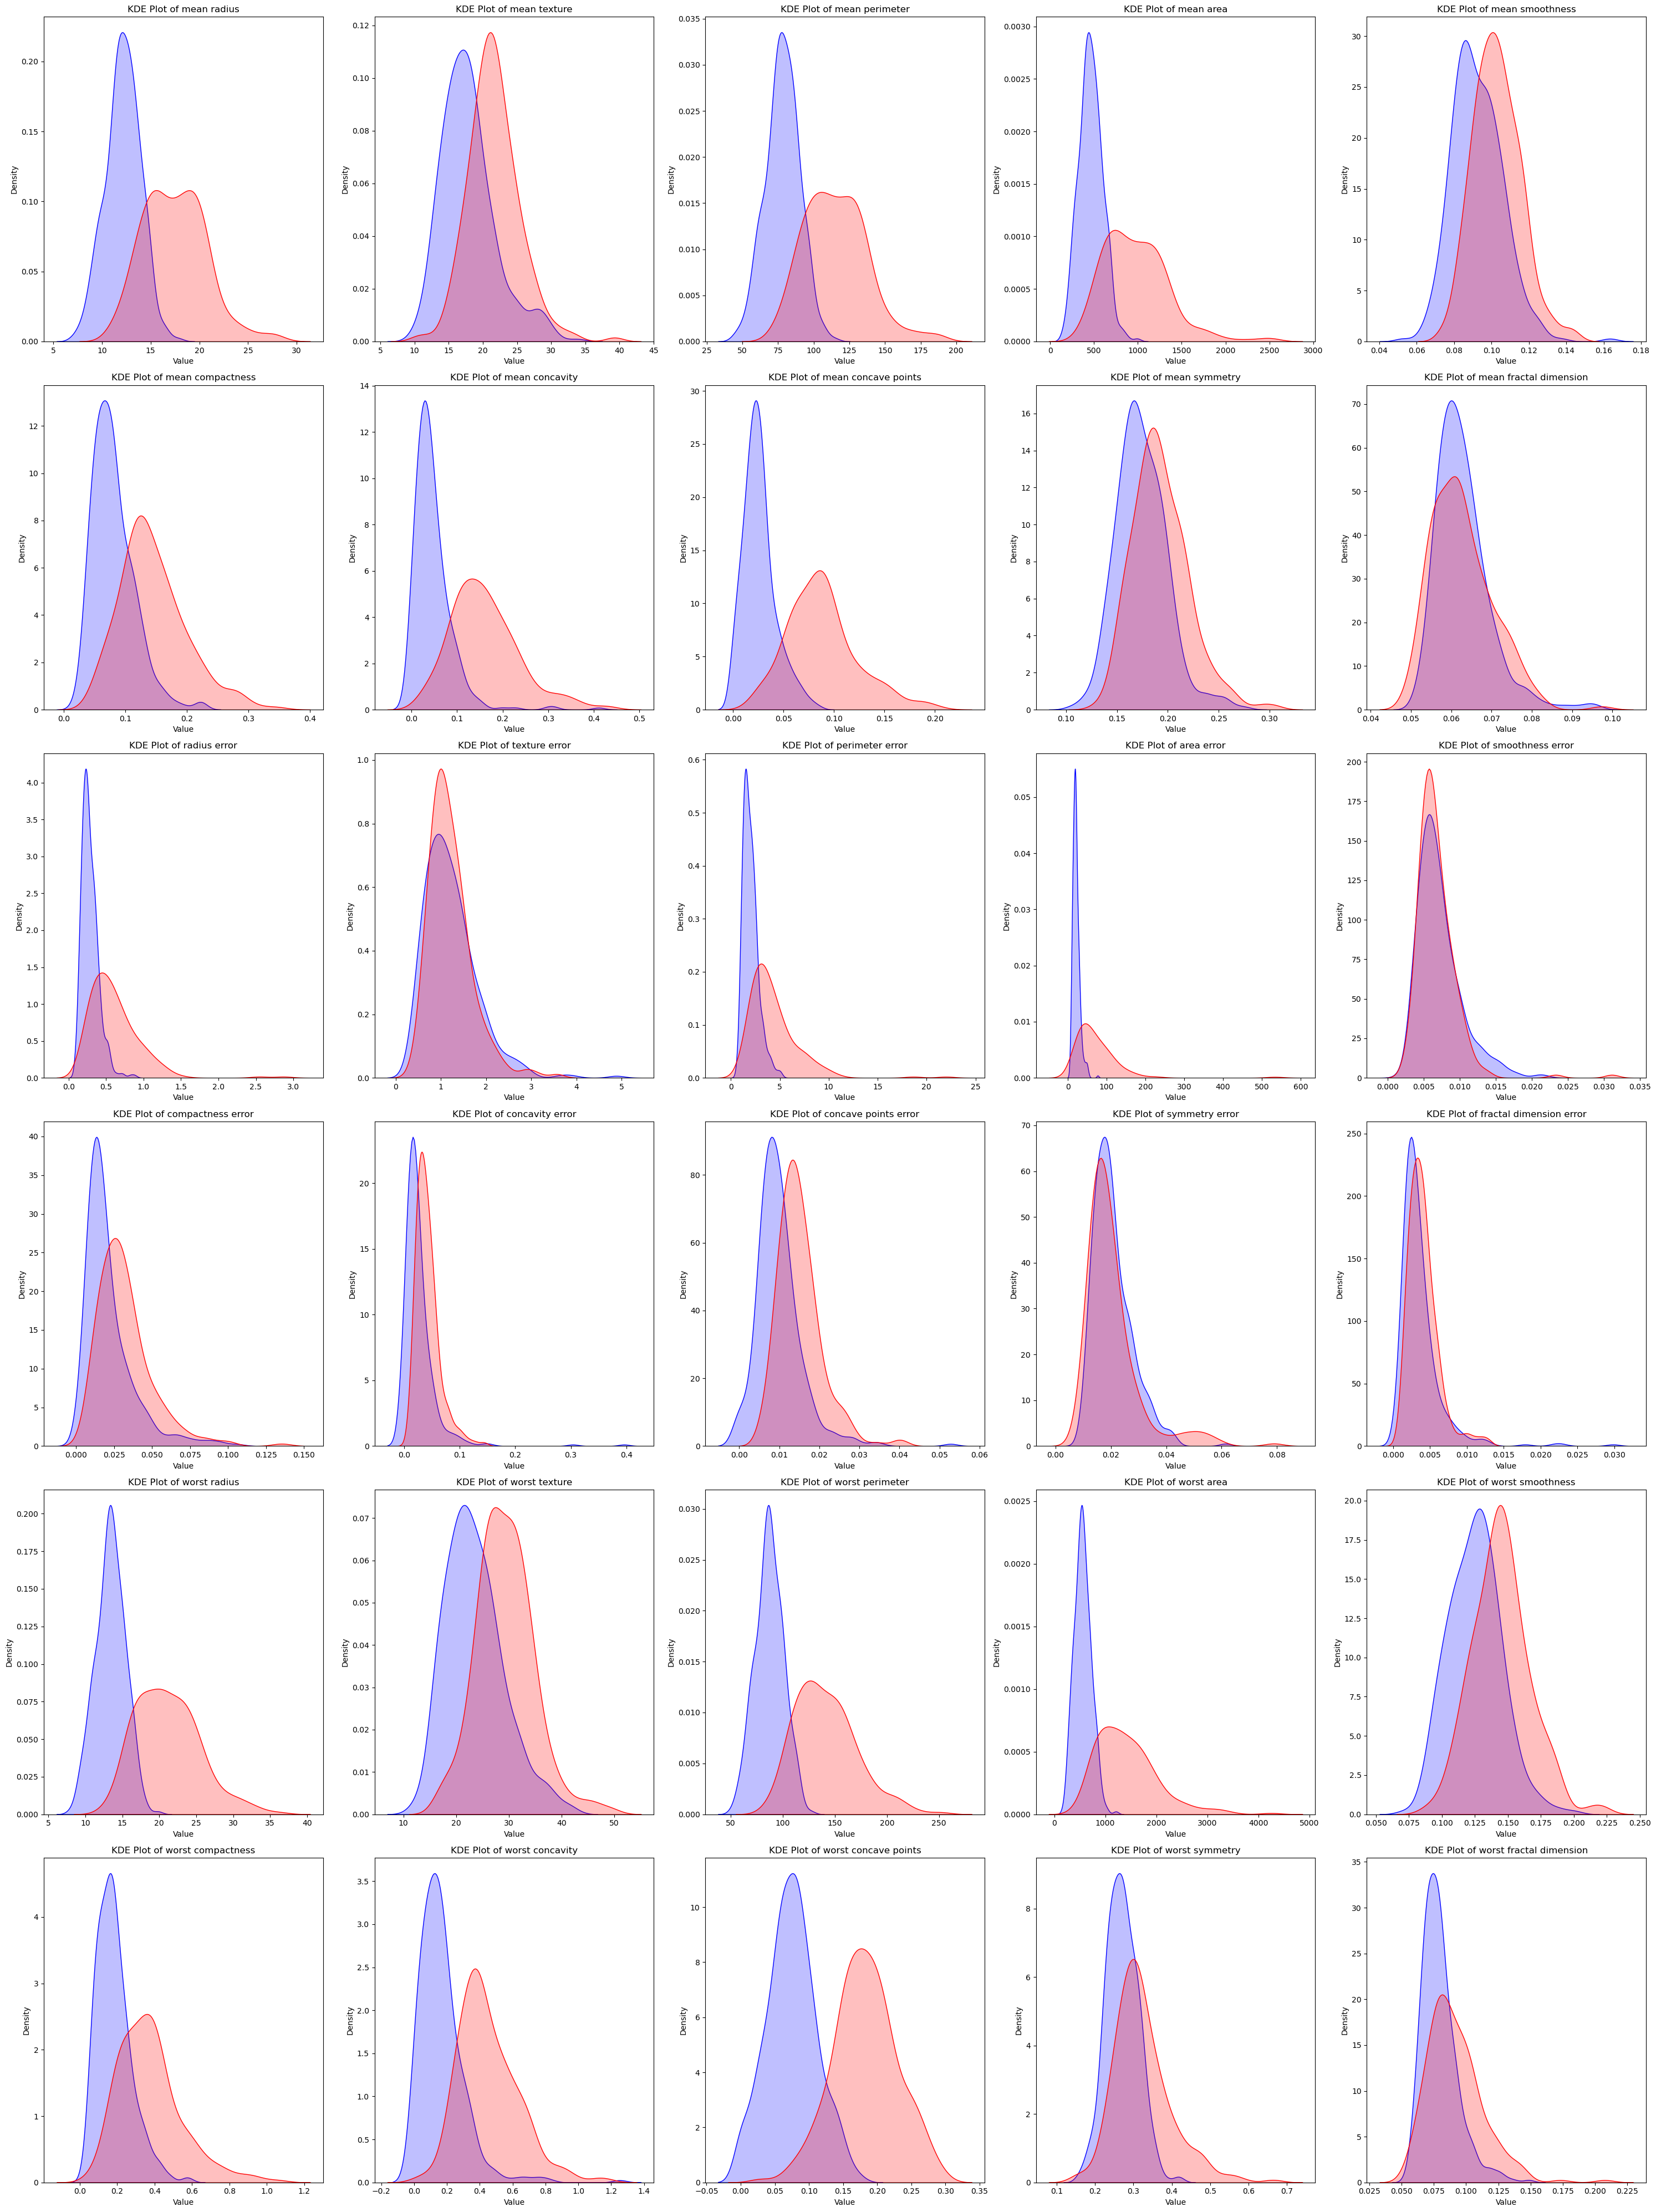

In [24]:
features = df.drop(columns=["diagnosis_label", "diagnosis_numeric"]).columns

# KDE plots for all features
plt.figure(figsize=(30, 40))  # Adjust figure size to fit all plots
for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)  # Creating a grid of subplots (10 rows, 3 columns)
    sns.kdeplot(df[df["diagnosis_label"] == "Benign"][feature], label="Benign", fill=True, color="blue")
    sns.kdeplot(df[df["diagnosis_label"] == "Malignant"][feature], label="Malignant", fill=True, color="red")
    plt.title(f"KDE Plot of {feature}")
    plt.xlabel("Value")
    plt.ylabel("Density")

plt.tight_layout()
plt.savefig("KDEplt_ALLfeatures.png", dpi=300, bbox_inches="tight")

plt.show()

## Pairplot For All Features features

In [46]:
pairplot_df = df.select_dtypes(include=["number"])

sns.pairplot(pairplot_df, hue="diagnosis_numeric", diag_kind="kde", palette={0: "blue", 1: "red"})
plt.suptitle("Pairplot of All Features by Diagnosis", fontsize=16, y=1.02)
plt.show()

## Pairplot of Selected Features

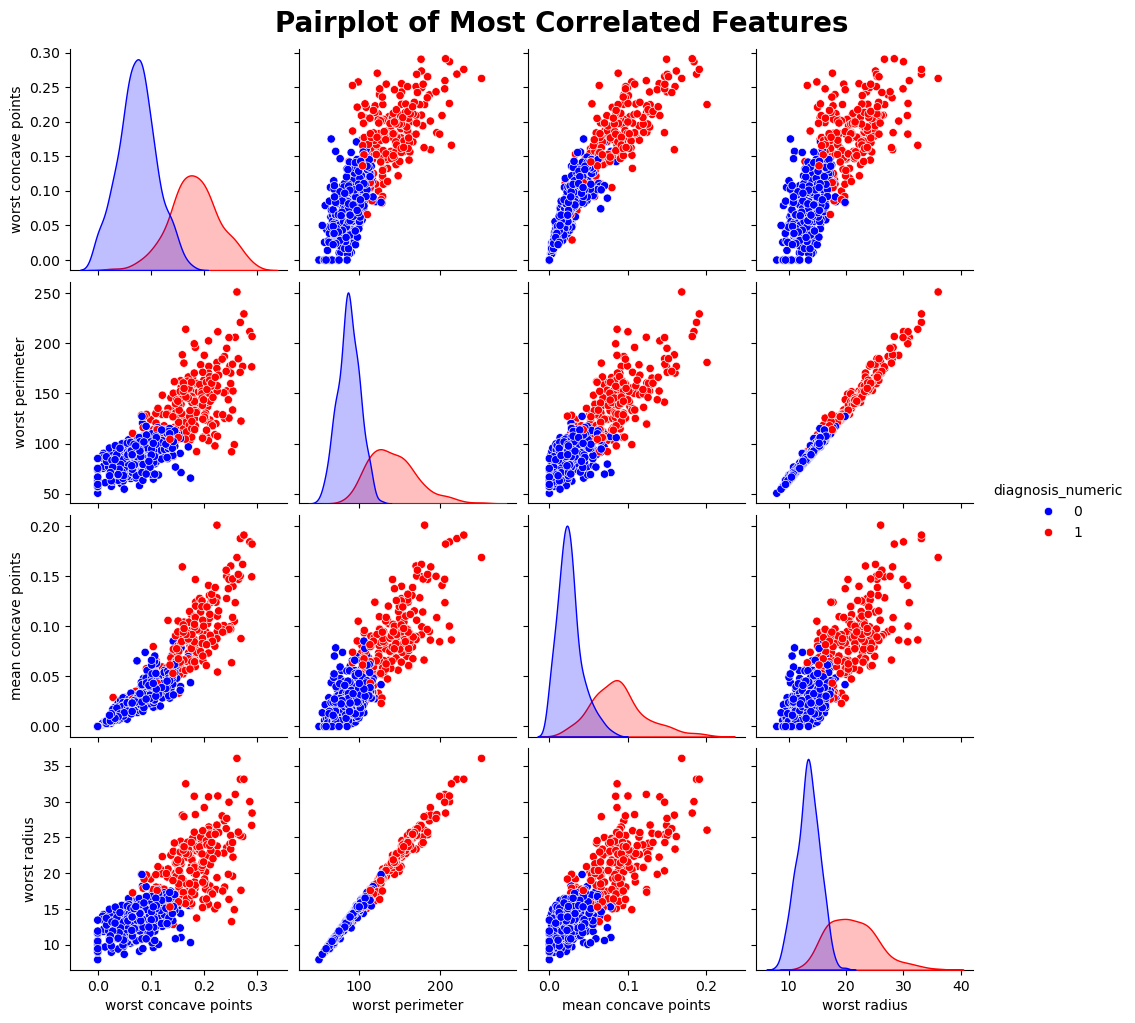

In [49]:
top_4_features = corr_map["diagnosis_numeric"].drop("diagnosis_numeric").abs().sort_values(ascending=False).head(4).index.tolist()

# Add diagnosis_numeric back for hue
sns.pairplot(
    df[top_4_features + ["diagnosis_numeric"]],
    hue="diagnosis_numeric",
    diag_kind="kde",
    palette={0: "blue", 1: "red"}
)

# Add title and save
plt.suptitle("Pairplot of Most Correlated Features", fontsize=20, y=1.02, fontweight='bold')
plt.savefig("SCATTERplt_TOP4features.png", dpi=300, bbox_inches="tight")
plt.show()

# Overview of Explanatory Data Analysis
- Loaded the dataset and ensured the labels were correct for maligant and benign. Having Malignant as 1 and benign as 0 will make more sense when looking at confusion matrices as negatives are associated with benign and positive is associated with malignant tumour classification.
- No missing data found
- Data set distribution is slightly imbalanced with the benign class dominating.
- Sumary statistics revealed that the feature maginutes are within a large range. This is important and highlights the need for scaling for ML models which are sensitive to feature value ranges.
- Correlation heatmap revealed feature relationships with eachother and diagnosis column.
- KDE plots illustrated that highly correlated features show good class separation. Malignant cases have higher feature values in general.
- Pairplot for all features plotted alongside pairplot for selected features for a better view. 